## <h3> Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <h3> Reading and displaying dataset

In [2]:
loan_data = pd.read_csv('LoanApprovalPrediction.csv')
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Data Preporcessing and Visualisation

## <h3> Getting count of columns with categorical data

In [3]:
obj = (loan_data.dtypes=='object')
catv = list(loan_data.columns[obj])
print(f'Categorical variables: {catv}')
print(f'Categorical Variables count: {len(list(obj[obj].index))}')

Categorical variables: ['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Categorical Variables count: 7


## <h3> Loan_ID is completely unique and not correlated with any other attribute hence it is dropped

In [4]:
loan_data.drop(['Loan_ID'],axis=1,inplace=True)

## <h3> Visualising all categorical variables to identify the dominant value in the resective variable

## <h3> Gender

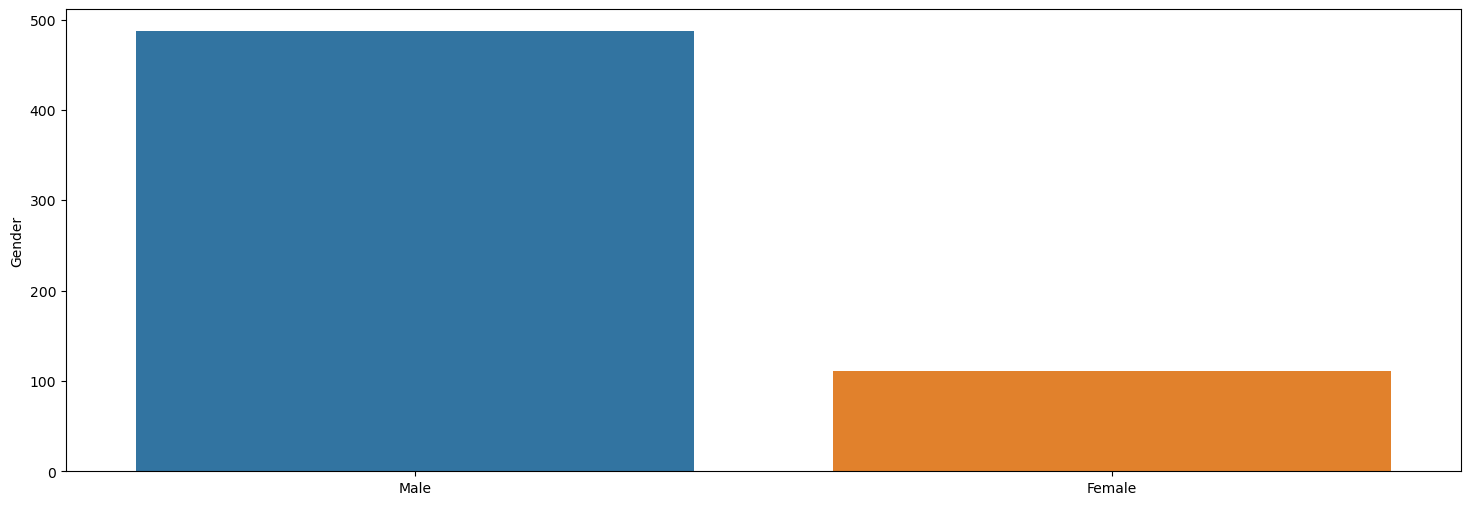

In [5]:
plt.figure(figsize=(18,6))
y=loan_data['Gender'].value_counts()
sns.barplot(x=list(y.index),y=y)
plt.show()

## <h3> Married

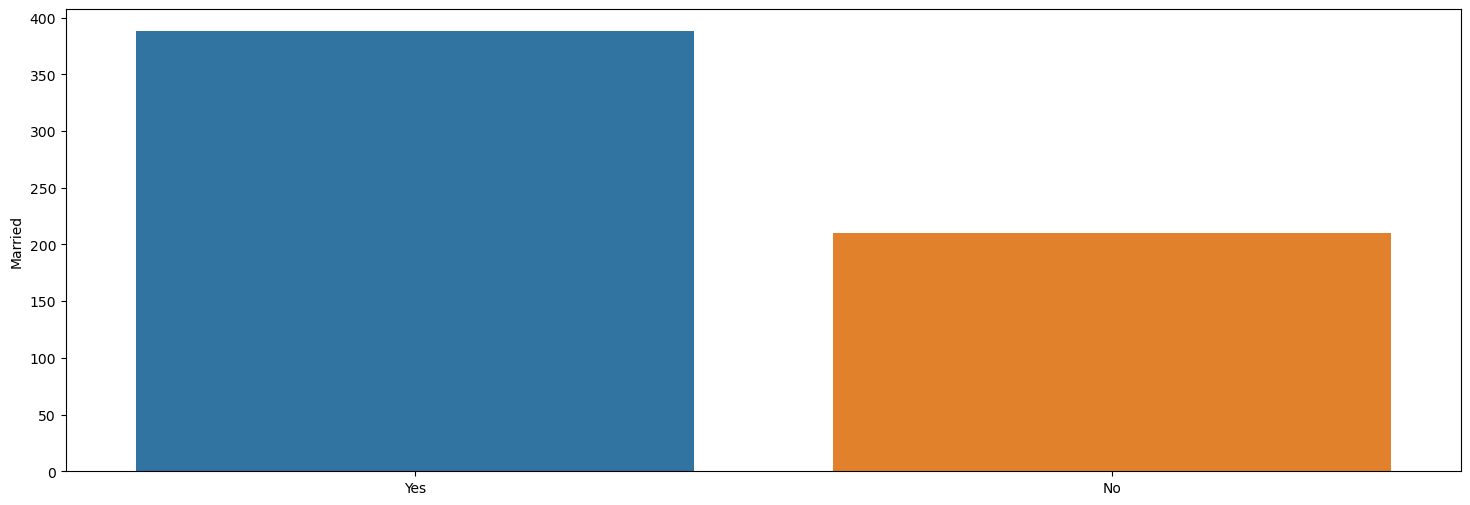

In [6]:
plt.figure(figsize=(18,6))
y=loan_data['Married'].value_counts()
sns.barplot(x=list(y.index),y=y)
plt.show()

## <h3> Education

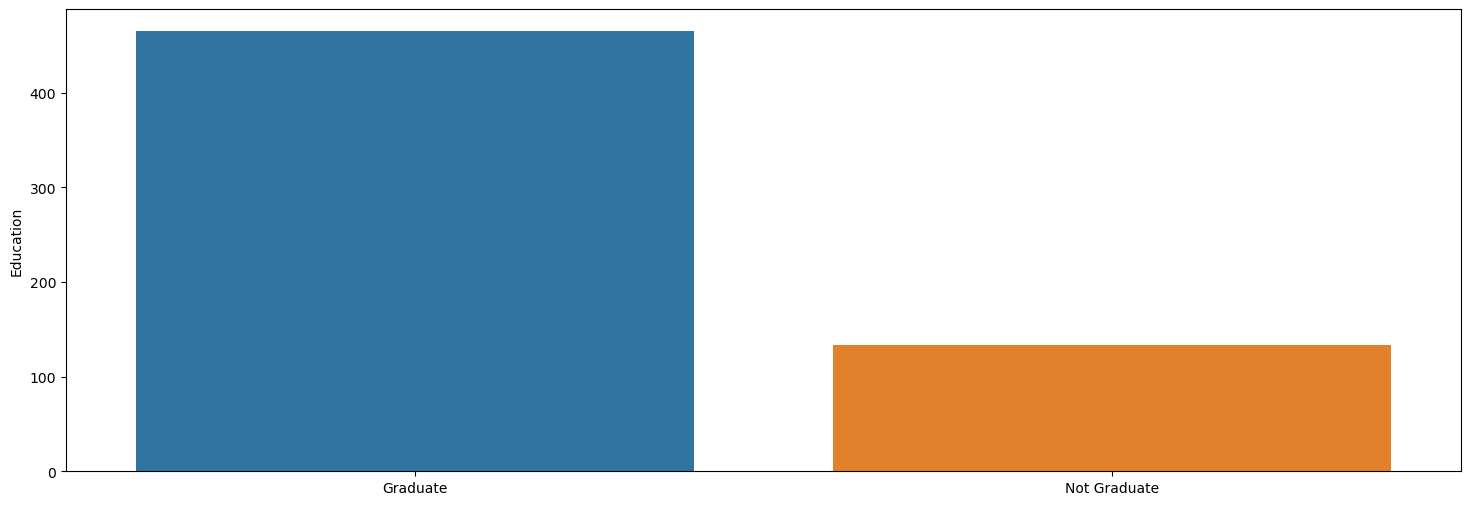

In [7]:
plt.figure(figsize=(18,6))
y=loan_data['Education'].value_counts()
sns.barplot(x=list(y.index),y=y)
plt.show()

## <h3> Self_Employed

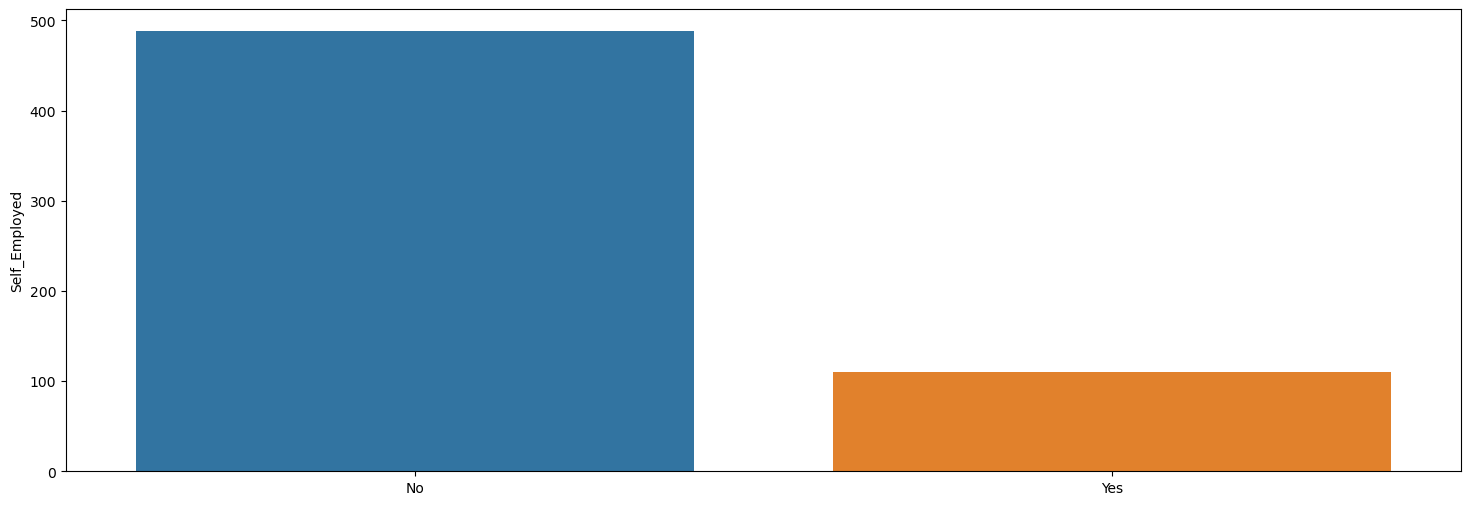

In [8]:
plt.figure(figsize=(18,6))
y=loan_data['Self_Employed'].value_counts()
sns.barplot(x=list(y.index),y=y)
plt.show()

## <h3> Property_Area

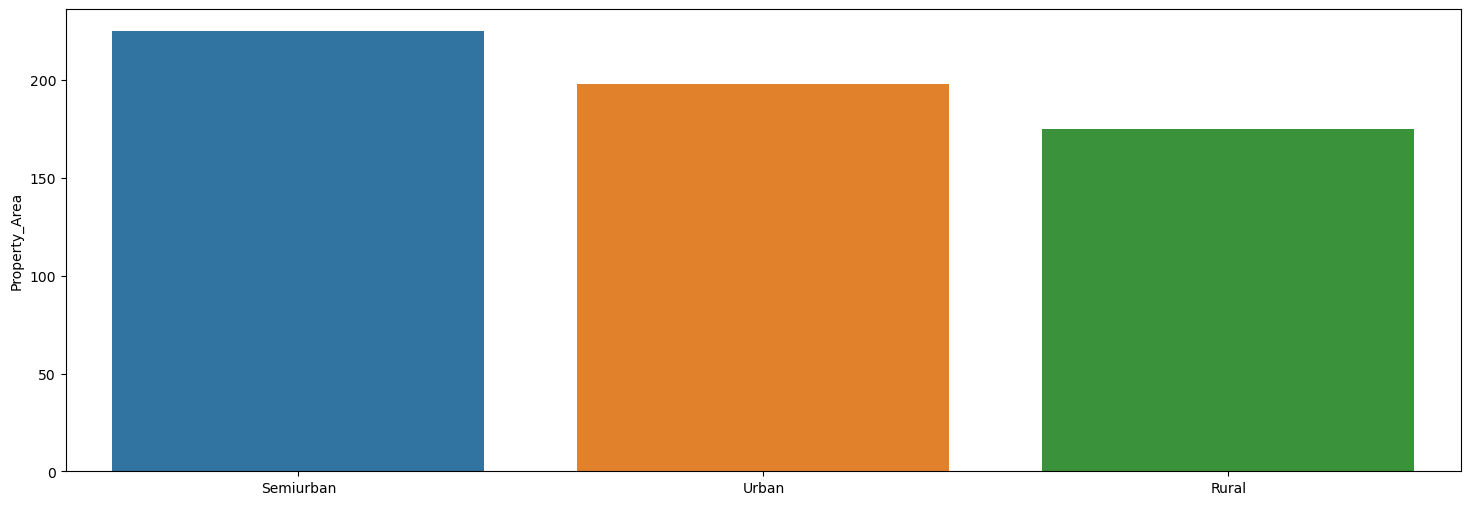

In [9]:
plt.figure(figsize=(18,6))
y=loan_data['Property_Area'].value_counts()
sns.barplot(x=list(y.index),y=y)
plt.show()

## <h3> Loan_Status

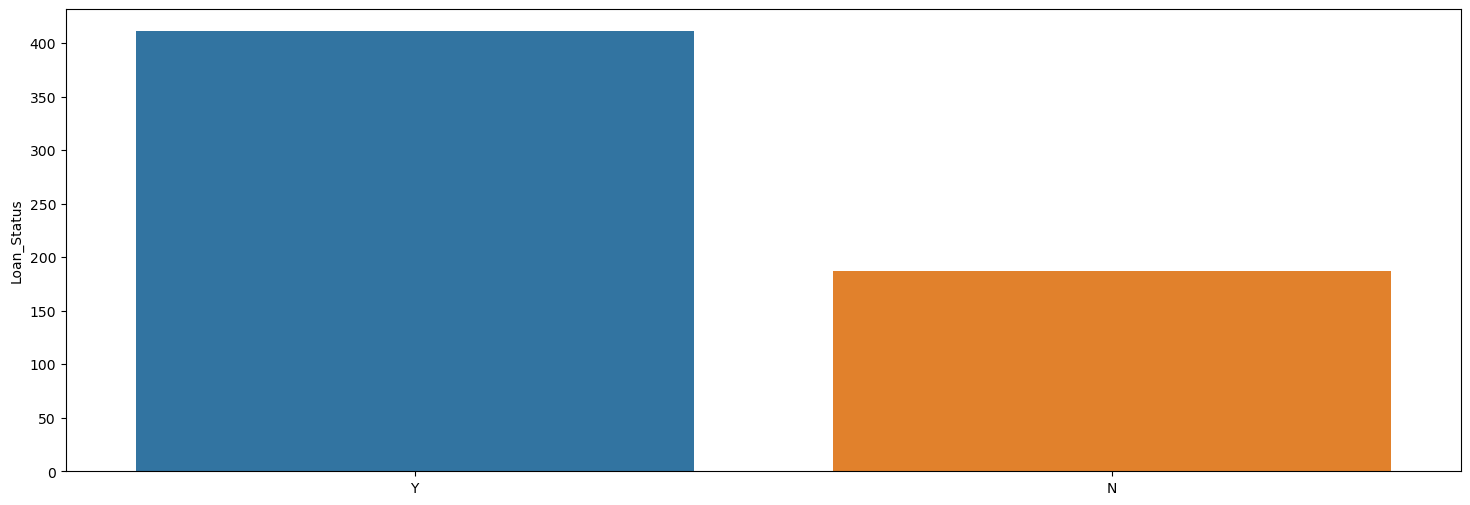

In [10]:
plt.figure(figsize=(18,6))
y=loan_data['Loan_Status'].value_counts()
sns.barplot(x=list(y.index),y=y)
plt.show()

## <h3> All categorical variables are binary so we use LabelEncoder for all coluns and change them into int datatype 

In [11]:
from sklearn import preprocessing
## Use label encoder to assgin ineger value to categorical variables
label_encoder = preprocessing.LabelEncoder()
obj = (loan_data.dtypes=='object')
for col in list(obj[obj].index):
    loan_data[col]=label_encoder.fit_transform(loan_data[col])

## <h3> Check if there are any columns left with datatype as object

In [12]:
obj = (loan_data.dtypes=='object')
print(f'Categorical variables: {len(list(obj[obj].index))}')

Categorical variables: 0


## <h3> Plotting heatmap to find correlated variables

<Axes: >

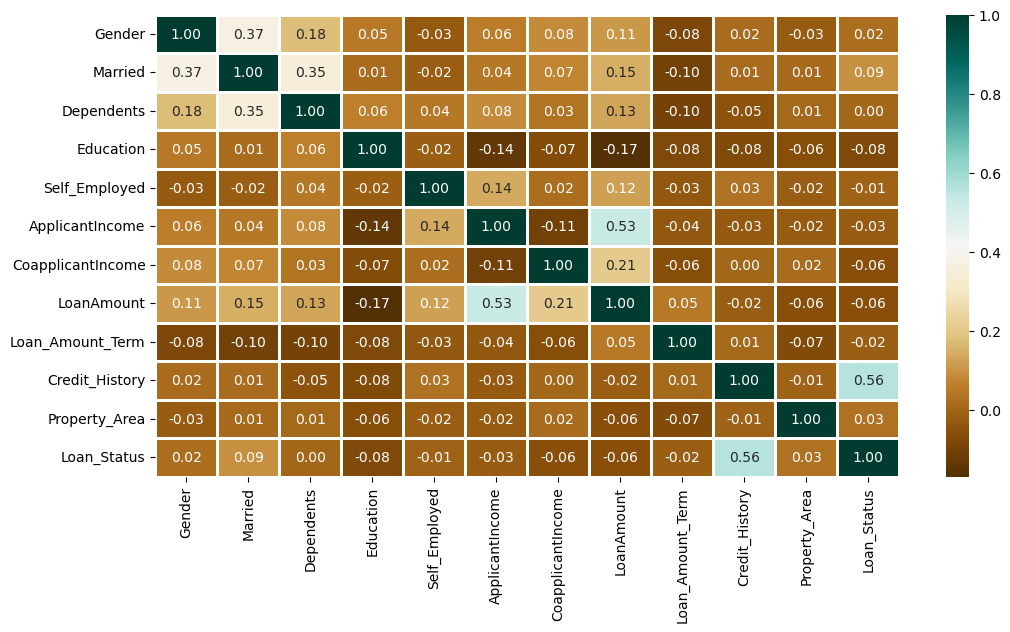

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(loan_data.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

## <h3> The above heatmap is showing correlation between LoanAmount and ApplicantIncome. It also shows Credit_History has high impact on Loan_Status

## <h3> Using Catplot to visualize relation between Gender and Marital status of Applicant

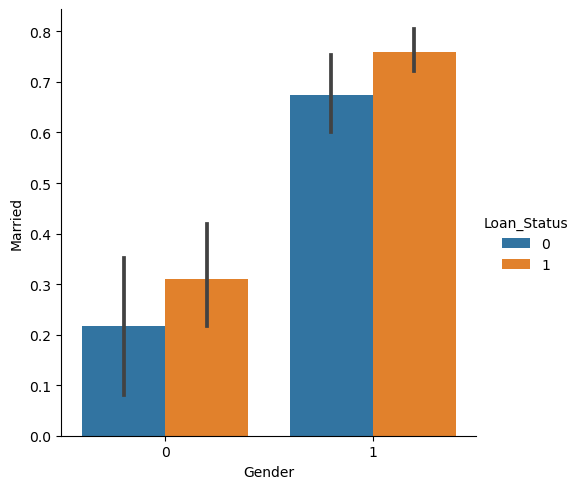

In [14]:
sns.catplot(x='Gender',y='Married',hue='Loan_Status',kind='bar',data=loan_data)

## <h3> Checking for missing and null values. If any missing or null values are present they are filled with the mean values of that attribute

In [15]:
for col in loan_data.columns:
    loan_data[col]=loan_data[col].fillna(loan_data[col].mean())
loan_data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## <h3> Since there are no missing values present we proceed to model selection

## <h3> Splitting dataset

In [16]:
from sklearn.model_selection import train_test_split
X = loan_data.drop(['Loan_Status'],axis=1)
Y = loan_data['Loan_Status']
X.shape,Y.shape

((598, 11), (598,))

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=1)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((358, 11), (240, 11), (358,), (240,))

## Model Training and Evaluation with visualisation of model performance

## <h3> 1.KNeighborsClassifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,Y_train)
knn_pred = knn_model.predict(X_train)
print(f'Accuracy of KNeighborsClassifier: {100*metrics.accuracy_score(Y_train,knn_pred)}')

Accuracy of KNeighborsClassifier: 78.49162011173185


## <h3> 2.Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)
lr_pred = lr_model.predict(X_train)
print(f'Accuracy of LogisticRegression: {100*metrics.accuracy_score(Y_train,lr_pred)}')

Accuracy of LogisticRegression: 80.44692737430168


C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## <h3> 3.Support Vector Classifier(SVC)

In [20]:
from sklearn.svm import SVC
from sklearn import metrics

svc_model = SVC()
svc_model.fit(X_train,Y_train)
svc_pred = svc_model.predict(X_train)
print(f'Accuracy of SVC: {100*metrics.accuracy_score(Y_train,svc_pred)}')

Accuracy of SVC: 68.71508379888269


## <h3> 4.RandomForestClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfc_model = RandomForestClassifier(n_estimators=7,criterion='entropy',random_state=7)
rfc_model.fit(X_train,Y_train)
rfc_pred = rfc_model.predict(X_train)
print(f'Accuracy of RandomForestClassifier: {100*metrics.accuracy_score(Y_train,rfc_pred)}')

Accuracy of RandomForestClassifier: 98.04469273743017


## Visualisation of model performance

## <h3> 1.KNeighborsClassifier

## <h3> Confusion Matrix

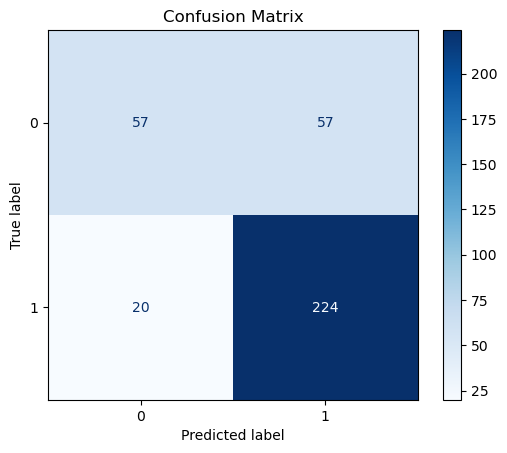

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicting on the training data
knn_pred = knn_model.predict(X_train)

# Confusion Matrix
cm = confusion_matrix(Y_train, knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## <h3> 2.LogisticRegression

## <h3> Confusion Matrix

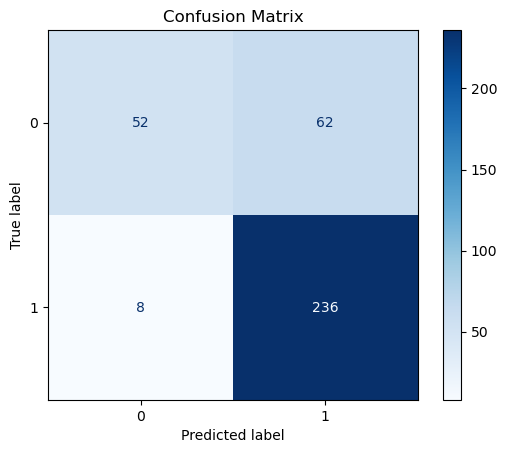

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Confusion Matrix
cm = confusion_matrix(Y_train, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## <h3> 3.SupportvectorClassifier

## <h3> Confusion Matrix

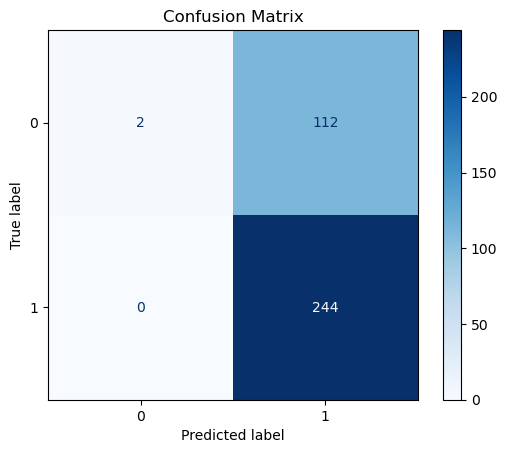

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Confusion Matrix
cm = confusion_matrix(Y_train,svc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## <h3> 4.RandomForestClassifier

## <h3> Confusion Matrix

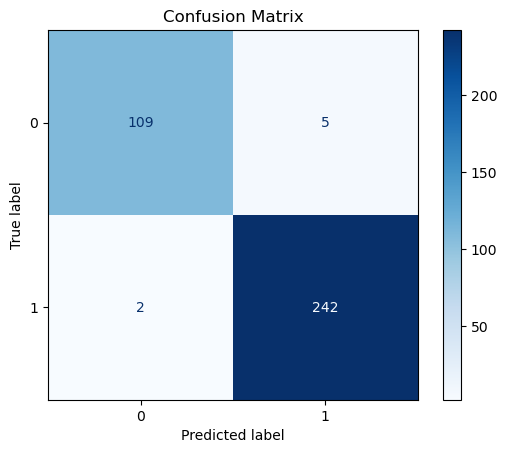

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Confusion Matrix
cm = confusion_matrix(Y_train,rfc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()